In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# importing the historical day ahead and real time locational marginal prices
# lmp2015 = pd.read_csv('data/rt_da_monthly_lmps_2015_PEPCO.csv')
lmp2016 = pd.read_csv('data/rt_da_monthly_lmps_2016_PEPCO.csv')
lmp2017 = pd.read_csv('data/rt_da_monthly_lmps_2017_PEPCO.csv')
lmp2018 = pd.read_csv('data/rt_da_monthly_lmps_2018_PEPCO.csv')
lmp2019 = pd.read_csv('data/rt_da_monthly_lmps_2019_PEPCO.csv')
# settled_lmps = lmp2015.append(lmp2016)
# settled_lmps = settled_lmps.append(lmp2017)
settled_lmps = lmp2016.append(lmp2017)
settled_lmps = settled_lmps.append(lmp2018)
settled_lmps = settled_lmps.append(lmp2019)

In [3]:
settled_lmps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33602 entries, 0 to 7294
Data columns (total 16 columns):
datetime_beginning_utc    33602 non-null object
datetime_beginning_ept    33602 non-null object
pnode_id                  33602 non-null int64
pnode_name                33602 non-null object
voltage                   0 non-null float64
equipment                 0 non-null float64
type                      33602 non-null object
zone                      0 non-null float64
system_energy_price_rt    33602 non-null float64
total_lmp_rt              33602 non-null float64
congestion_price_rt       33602 non-null float64
marginal_loss_price_rt    33602 non-null float64
system_energy_price_da    33602 non-null float64
total_lmp_da              33602 non-null float64
congestion_price_da       33602 non-null float64
marginal_loss_price_da    33602 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 4.4+ MB


In [4]:
# removing unneccessary columns
settled_lmps.drop(columns=['voltage',
                           'equipment',
                           'type',
                           'zone'], inplace=True)

In [5]:
settled_lmps.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,1/1/2017 5:00:00 AM,1/1/2017 12:00:00 AM,51298,PEPCO,25.43,27.322355,1.107805,0.784549,25.02,27.364613,1.070623,1.273990
1,1/1/2017 4:00:00 AM,12/31/2016 11:00:00 PM,51298,PEPCO,24.64,25.486471,0.045640,0.800831,24.09,26.939663,1.802677,1.046986
2,1/1/2017 3:00:00 AM,12/31/2016 10:00:00 PM,51298,PEPCO,25.90,26.768067,0.053535,0.814532,25.78,28.021676,1.260243,0.981433
3,1/1/2017 2:00:00 AM,12/31/2016 9:00:00 PM,51298,PEPCO,26.08,26.946048,0.046858,0.819190,27.37,29.496542,1.140354,0.986188
4,1/1/2017 1:00:00 AM,12/31/2016 8:00:00 PM,51298,PEPCO,27.74,28.578787,0.024826,0.813961,28.58,30.734025,1.193828,0.960197


In [6]:
# converting select columns to datetime
settled_lmps['datetime_beginning_utc'] = pd.to_datetime(settled_lmps['datetime_beginning_utc'])
settled_lmps['datetime_beginning_ept'] = pd.to_datetime(settled_lmps['datetime_beginning_ept'])

In [7]:
settled_lmps.drop_duplicates(inplace=True)

In [8]:
settled_lmps.sort_values(by='datetime_beginning_utc', inplace=True)
settled_lmps.reset_index(drop=True, inplace=True)

In [9]:
settled_lmps

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
0,2016-01-01 05:00:00,2016-01-01 00:00:00,51298,PEPCO,19.360000,19.603853,0.040000,0.203853,20.32,20.996471,0.703161,-0.026690
1,2016-01-01 06:00:00,2016-01-01 01:00:00,51298,PEPCO,16.440000,16.727400,0.020000,0.267400,19.28,20.104409,0.857021,-0.032612
2,2016-01-01 07:00:00,2016-01-01 02:00:00,51298,PEPCO,14.210000,14.526689,0.070000,0.246689,17.07,17.944640,0.889730,-0.015090
3,2016-01-01 08:00:00,2016-01-01 03:00:00,51298,PEPCO,14.570000,15.547734,0.730859,0.246876,16.89,17.757075,0.890868,-0.023793
4,2016-01-01 09:00:00,2016-01-01 04:00:00,51298,PEPCO,15.100000,16.736856,1.386733,0.250123,17.37,18.446066,1.062460,0.013606
...,...,...,...,...,...,...,...,...,...,...,...,...
33594,2019-10-31 23:00:00,2019-10-31 19:00:00,51298,PEPCO,44.308333,64.620824,19.774818,0.537673,33.61,40.442592,6.693291,0.139301
33595,2019-11-01 00:00:00,2019-10-31 20:00:00,51298,PEPCO,34.110000,43.749605,9.315070,0.324535,33.52,39.750780,6.218231,0.012549
33596,2019-11-01 01:00:00,2019-10-31 21:00:00,51298,PEPCO,29.521667,35.694411,6.063727,0.109018,29.45,35.664129,6.358806,-0.144677
33597,2019-11-01 02:00:00,2019-10-31 22:00:00,51298,PEPCO,24.029167,27.566484,3.514332,0.022986,22.77,26.608556,3.866697,-0.028141


In [10]:
posted_rt_lmps = pd.read_csv('data/rt_hrl_lmps_11_2019_PEPCO.csv')
posted_da_lmps = pd.read_csv('data/da_hrl_lmps_11_2019_PEPCO.csv')

In [11]:
posted_lmps = posted_rt_lmps.drop(columns=['voltage',
                                           'equipment',
                                           'type',
                                           'zone',
                                           'row_is_current',
                                           'version_nbr'])

In [12]:
posted_lmps[['system_energy_price_da',
             'total_lmp_da',
             'congestion_price_da',
             'marginal_loss_price_da']] = posted_da_lmps[['system_energy_price_da',
                                                          'total_lmp_da',
                                                          'congestion_price_da',
                                                          'marginal_loss_price_da']]

In [13]:
posted_lmps['datetime_beginning_utc'] = pd.to_datetime(posted_lmps['datetime_beginning_utc'])
posted_lmps['datetime_beginning_ept'] = pd.to_datetime(posted_lmps['datetime_beginning_ept'])

In [14]:
posted_lmps.drop_duplicates(inplace=True)

In [15]:
lmp_df = settled_lmps.append(posted_lmps)
lmp_df.sort_values(by='datetime_beginning_utc', inplace=True)
lmp_df.reset_index(drop=True, inplace=True)

In [16]:
lmp_df.index = lmp_df['datetime_beginning_utc']
lmp_df.drop(columns='datetime_beginning_utc', inplace=True)

In [17]:
lmp_df.head()

,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
datetime_beginning_utc,,,,,,,,,,,
2016-01-01 05:00:00,2016-01-01 00:00:00,51298,PEPCO,19.36,19.603853,0.040000,0.203853,20.32,20.996471,0.703161,-0.026690
2016-01-01 06:00:00,2016-01-01 01:00:00,51298,PEPCO,16.44,16.727400,0.020000,0.267400,19.28,20.104409,0.857021,-0.032612
2016-01-01 07:00:00,2016-01-01 02:00:00,51298,PEPCO,14.21,14.526689,0.070000,0.246689,17.07,17.944640,0.889730,-0.015090
2016-01-01 08:00:00,2016-01-01 03:00:00,51298,PEPCO,14.57,15.547734,0.730859,0.246876,16.89,17.757075,0.890868,-0.023793
2016-01-01 09:00:00,2016-01-01 04:00:00,51298,PEPCO,15.10,16.736856,1.386733,0.250123,17.37,18.446066,1.062460,0.013606


In [18]:
lmp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 11 columns):
datetime_beginning_ept    34080 non-null datetime64[ns]
pnode_id                  34080 non-null int64
pnode_name                34080 non-null object
system_energy_price_rt    34080 non-null float64
total_lmp_rt              34080 non-null float64
congestion_price_rt       34080 non-null float64
marginal_loss_price_rt    34080 non-null float64
system_energy_price_da    34080 non-null float64
total_lmp_da              34080 non-null float64
congestion_price_da       34080 non-null float64
marginal_loss_price_da    34080 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 3.1+ MB


In [19]:
lmp_df.describe()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
count,34080.0,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000,34080.000000
mean,51298.0,29.847666,33.005022,2.551362,0.606002,29.950235,33.461132,2.927821,0.583076
std,0.0,21.930728,28.101713,9.230076,0.840894,14.868830,18.109079,4.492250,0.619473
min,51298.0,-56.710000,-53.471480,-109.388085,-5.326984,2.270000,4.636074,-41.624613,-1.382850
25%,51298.0,21.180000,22.703391,0.000000,0.227115,22.020000,23.991502,0.510182,0.238615
50%,51298.0,24.960000,27.215821,0.276346,0.450049,26.790000,29.645120,1.780171,0.474784
75%,51298.0,31.508125,34.001831,2.986970,0.765767,33.970000,37.995880,3.870529,0.782814
max,51298.0,690.027500,953.119790,287.993853,27.531492,294.830000,385.995223,95.276622,11.172696


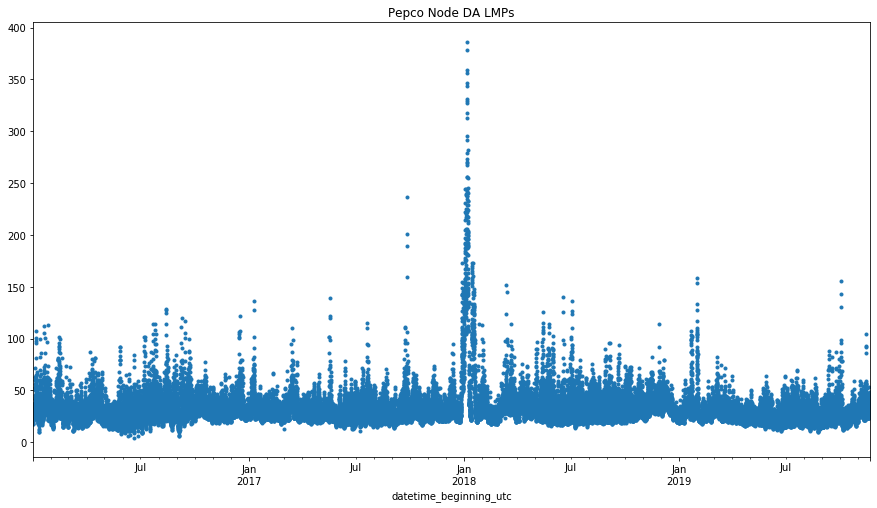

In [20]:
lmp_df['total_lmp_da'].plot(style='.', figsize=(15,8), title="Pepco Node DA LMPs");

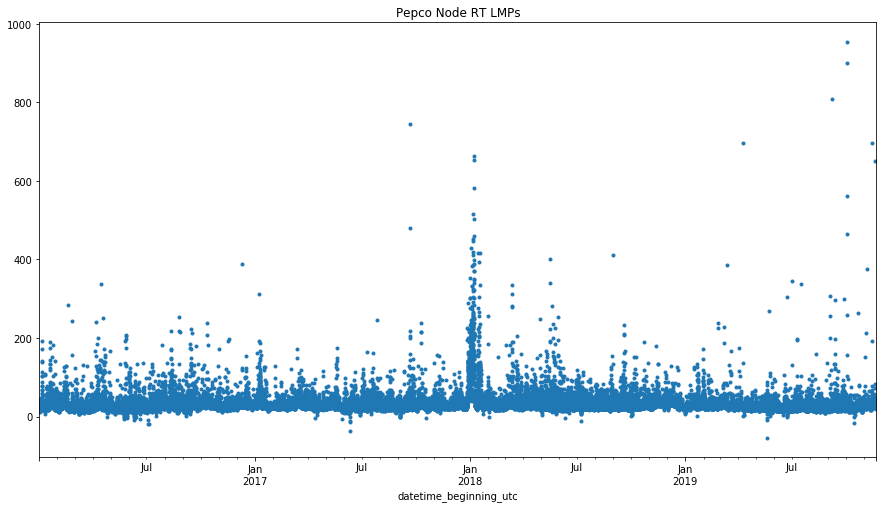

In [21]:
lmp_df['total_lmp_rt'].plot(style='.', figsize=(15,8), title="Pepco Node RT LMPs");

In [22]:
# load data

In [23]:
# pepco_load_2015 = pd.read_csv('data/hrl_load_metered_2015_PEPCO.csv')
pepco_load_2016 = pd.read_csv('data/hrl_load_metered_2016_PEPCO.csv')
pepco_load_2017 = pd.read_csv('data/hrl_load_metered_2017_PEPCO.csv')
pepco_load_2018 = pd.read_csv('data/hrl_load_metered_2018_PEPCO.csv')
pepco_load_2019 = pd.read_csv('data/hrl_load_metered_2019_PEPCO.csv')
# pepco_load = pepco_load_2015.append(pepco_load_2016)
# pepco_load = pepco_load.append(pepco_load_2017)
pepco_load = pepco_load_2016.append(pepco_load_2017)
pepco_load = pepco_load.append(pepco_load_2018)
pepco_load = pepco_load.append(pepco_load_2019)

In [24]:
pepco_load.rename({'mw': 'pepco_mw'}, axis=1, inplace=True)

In [25]:
pepco_load.drop(columns=['datetime_beginning_ept',
                         'nerc_region',
                         'mkt_region',
                         'zone',
                         'load_area',
                         'is_verified'], inplace=True)

In [26]:
pepco_load['datetime_beginning_utc'] = pd.to_datetime(pepco_load['datetime_beginning_utc'])

In [27]:
pepco_load.drop_duplicates(inplace=True)

In [28]:
pepco_load.sort_values(by='datetime_beginning_utc', inplace=True)
pepco_load.index = pepco_load['datetime_beginning_utc']
pepco_load.drop(columns='datetime_beginning_utc', inplace=True)

In [29]:
pepco_load.head()

,pepco_mw
datetime_beginning_utc,
2016-01-01 05:00:00,2351.764
2016-01-01 06:00:00,2325.194
2016-01-01 07:00:00,2269.001
2016-01-01 08:00:00,2273.126
2016-01-01 09:00:00,2243.840


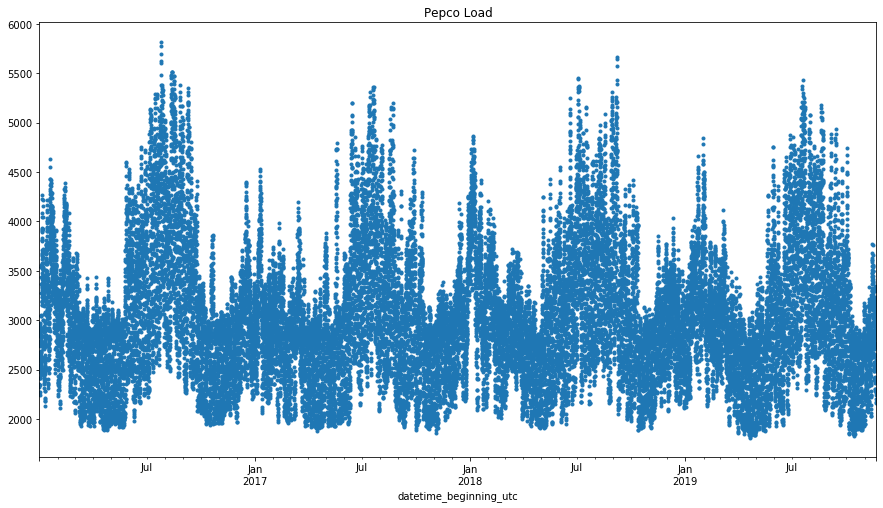

In [30]:
pepco_load['pepco_mw'].plot(style='.', figsize=(15,8), title="Pepco Load");

In [31]:
# midatl_load_2015 = pd.read_csv('data/hrl_load_metered_2015_MIDATL.csv')
midatl_load_2016 = pd.read_csv('data/hrl_load_metered_2016_MIDATL.csv')
midatl_load_2017 = pd.read_csv('data/hrl_load_metered_2017_MIDATL.csv')
midatl_load_2018 = pd.read_csv('data/hrl_load_metered_2018_MIDATL.csv')
midatl_load_2019 = pd.read_csv('data/hrl_load_metered_2019_MIDATL.csv')
# midatl_load = midatl_load_2015.append(midatl_load_2016)
# midatl_load = midatl_load.append(midatl_load_2017)
midatl_load = midatl_load_2016.append(midatl_load_2017)
midatl_load = midatl_load.append(midatl_load_2018)
midatl_load = midatl_load.append(midatl_load_2019)

In [32]:
midatl_load.rename({'mw': 'midatl_mw'}, axis=1, inplace=True)

In [33]:
midatl_load.drop(columns=['datetime_beginning_ept',
                          'nerc_region',
                          'mkt_region',
                          'zone',
                          'load_area',
                          'is_verified'], inplace=True)

In [34]:
midatl_load['datetime_beginning_utc'] = pd.to_datetime(midatl_load['datetime_beginning_utc'])

In [35]:
midatl_load.drop_duplicates(inplace=True)

In [36]:
midatl_load.sort_values(by='datetime_beginning_utc', inplace=True)
midatl_load.index = midatl_load['datetime_beginning_utc']

In [37]:
midatl_load = midatl_load.resample('1H').sum()

In [38]:
load_df = pepco_load.merge(midatl_load, how='left', left_index=True, right_index=True)

In [39]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 2 columns):
pepco_mw     34080 non-null float64
midatl_mw    34080 non-null float64
dtypes: float64(2)
memory usage: 2.0 MB


In [40]:
load_df.head()

,pepco_mw,midatl_mw
datetime_beginning_utc,,
2016-01-01 05:00:00,2351.764,25218.694
2016-01-01 06:00:00,2325.194,24350.804
2016-01-01 07:00:00,2269.001,23665.242
2016-01-01 08:00:00,2273.126,23383.814
2016-01-01 09:00:00,2243.840,23487.854


In [41]:
# midatl_frcstd_load_2015 = pd.read_csv('data/load_frcstd_hist_2015_MIDATL.csv')
midatl_frcstd_load_2016 = pd.read_csv('data/load_frcstd_hist_2016_MIDATL.csv')
midatl_frcstd_load_2017 = pd.read_csv('data/load_frcstd_hist_2017_MIDATL.csv')
midatl_frcstd_load_2018 = pd.read_csv('data/load_frcstd_hist_2018_MIDATL.csv')
midatl_frcstd_load_2019 = pd.read_csv('data/load_frcstd_hist_2019_MIDATL.csv')
# midatl_frcstd_load = midatl_frcstd_load_2015.append(midatl_frcstd_load_2016)
# midatl_frcstd_load = midatl_frcstd_load.append(midatl_frcstd_load_2017)
midatl_frcstd_load = midatl_frcstd_load_2016.append(midatl_frcstd_load_2017)
midatl_frcstd_load = midatl_frcstd_load.append(midatl_frcstd_load_2018)
midatl_frcstd_load = midatl_frcstd_load.append(midatl_frcstd_load_2019)

In [42]:
midatl_frcstd_load.rename({'forecast_load_mw': 'midatl_forecast_load_mw'}, axis=1, inplace=True)

In [43]:
midatl_frcstd_load.drop(columns=['forecast_hour_beginning_ept',
                                 'forecast_area'], inplace=True)

In [44]:
midatl_frcstd_load['evaluated_at_utc'] = pd.to_datetime(midatl_frcstd_load['evaluated_at_utc'])
midatl_frcstd_load['evaluated_at_ept'] = pd.to_datetime(midatl_frcstd_load['evaluated_at_ept'])
midatl_frcstd_load['forecast_hour_beginning_utc'] = pd.to_datetime(midatl_frcstd_load['forecast_hour_beginning_utc'])

In [45]:
midatl_frcstd_load.drop_duplicates(inplace=True)

In [46]:
midatl_frcstd_load.sort_values(by=['forecast_hour_beginning_utc', 'evaluated_at_utc'], inplace=True)
midatl_frcstd_load.reset_index(drop=True, inplace=True)

In [47]:
# selecting the oldest forecast for simplicity and to limit data leakage
hrly_midatl_frcstd_load = midatl_frcstd_load.groupby(by='forecast_hour_beginning_utc').idxmin()
midatl_frcstd_load = midatl_frcstd_load.iloc[hrly_midatl_frcstd_load.iloc[:,0]]

In [48]:
midatl_frcstd_load.index = midatl_frcstd_load['forecast_hour_beginning_utc']
midatl_frcstd_load.drop(columns=['forecast_hour_beginning_utc'], inplace=True)

In [49]:
midatl_frcstd_load.head()

,evaluated_at_utc,evaluated_at_ept,midatl_forecast_load_mw
forecast_hour_beginning_utc,,,
2016-01-01 05:00:00,2015-12-31 14:45:00,2015-12-31 09:45:00,26712
2016-01-01 06:00:00,2015-12-31 14:45:00,2015-12-31 09:45:00,25832
2016-01-01 07:00:00,2015-12-31 14:45:00,2015-12-31 09:45:00,25402
2016-01-01 08:00:00,2015-12-31 14:45:00,2015-12-31 09:45:00,25361
2016-01-01 09:00:00,2015-12-31 14:45:00,2015-12-31 09:45:00,25767


In [50]:
load_df = load_df.merge(midatl_frcstd_load, how='left', left_index=True, right_index=True)

In [51]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 5 columns):
pepco_mw                   34080 non-null float64
midatl_mw                  34080 non-null float64
evaluated_at_utc           34080 non-null datetime64[ns]
evaluated_at_ept           34080 non-null datetime64[ns]
midatl_forecast_load_mw    34080 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 2.8 MB


In [52]:
load_df.tail()

,pepco_mw,midatl_mw,evaluated_at_utc,evaluated_at_ept,midatl_forecast_load_mw
datetime_beginning_utc,,,,,
2019-11-21 00:00:00,3058.263,33498.709,2019-11-19 10:45:00,2019-11-19 05:45:00,33966
2019-11-21 01:00:00,2971.795,32658.387,2019-11-19 10:45:00,2019-11-19 05:45:00,32979
2019-11-21 02:00:00,2829.161,31248.858,2019-11-19 10:45:00,2019-11-19 05:45:00,31511
2019-11-21 03:00:00,2650.363,29184.714,2019-11-19 10:45:00,2019-11-19 05:45:00,29481
2019-11-21 04:00:00,2487.477,27440.844,2019-11-19 10:45:00,2019-11-19 05:45:00,27716


In [53]:
lmp_df.tail()

,datetime_beginning_ept,pnode_id,pnode_name,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da
datetime_beginning_utc,,,,,,,,,,,
2019-11-21 00:00:00,2019-11-20 19:00:00,51298,PEPCO,22.66,24.244510,0.955136,0.631041,32.25,37.603160,5.064800,0.288360
2019-11-21 01:00:00,2019-11-20 20:00:00,51298,PEPCO,23.98,24.658104,0.006310,0.672627,31.85,37.131499,4.987413,0.294086
2019-11-21 02:00:00,2019-11-20 21:00:00,51298,PEPCO,24.23,24.220312,-0.676727,0.667872,25.88,29.152662,3.082246,0.190416
2019-11-21 03:00:00,2019-11-20 22:00:00,51298,PEPCO,20.14,21.625209,0.906794,0.579248,23.53,25.994099,2.257015,0.207084
2019-11-21 04:00:00,2019-11-20 23:00:00,51298,PEPCO,20.01,21.993846,1.293597,0.686916,22.80,24.651011,1.802089,0.048922


In [54]:
data_df = lmp_df.merge(load_df, how='left', left_index=True, right_index=True)
data_df.index.name = 'datetime_beginning_utc'

In [55]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 16 columns):
datetime_beginning_ept     34080 non-null datetime64[ns]
pnode_id                   34080 non-null int64
pnode_name                 34080 non-null object
system_energy_price_rt     34080 non-null float64
total_lmp_rt               34080 non-null float64
congestion_price_rt        34080 non-null float64
marginal_loss_price_rt     34080 non-null float64
system_energy_price_da     34080 non-null float64
total_lmp_da               34080 non-null float64
congestion_price_da        34080 non-null float64
marginal_loss_price_da     34080 non-null float64
pepco_mw                   34080 non-null float64
midatl_mw                  34080 non-null float64
evaluated_at_utc           34080 non-null datetime64[ns]
evaluated_at_ept           34080 non-null datetime64[ns]
midatl_forecast_load_mw    34080 non-null int64
dtypes: datetime64[ns](3), float64(10), 

In [56]:
# interface data

In [57]:
# interface_flows_2015 = pd.read_csv('data/da_interface_flows_and_limits_2015_ALL.csv')
interface_flows_2016 = pd.read_csv('data/da_interface_flows_and_limits_2016_ALL.csv')
interface_flows_2017 = pd.read_csv('data/da_interface_flows_and_limits_2017_ALL.csv')
interface_flows_2018 = pd.read_csv('data/da_interface_flows_and_limits_2018_ALL.csv')
interface_flows_2019 = pd.read_csv('data/da_interface_flows_and_limits_2019_ALL.csv')
# interface_flows = interface_flows_2015.append(interface_flows_2016)
# interface_flows = interface_flows.append(interface_flows_2017)
interface_flows_stack = interface_flows_2016.append(interface_flows_2017)
interface_flows_stack = interface_flows_stack.append(interface_flows_2018)
interface_flows_stack = interface_flows_stack.append(interface_flows_2019)

In [58]:
interface_flows_stack.drop(columns=['datetime_beginning_ept'], inplace=True)

In [59]:
interface_flows_stack.tail()

,datetime_beginning_utc,interface_limit_name,flow_mw,limit_mw
48379,12/4/2019 4:00:00 AM,BCPEP,3274,4900
48380,12/4/2019 4:00:00 AM,BED-BLA,1388,1500
48381,12/4/2019 4:00:00 AM,CENTRAL,1171,2300
48382,12/4/2019 4:00:00 AM,EAST,4330,6700
48383,12/4/2019 4:00:00 AM,WEST,2701,5700


In [60]:
interface_flows = interface_flows_stack[['datetime_beginning_utc']].copy()
interface_flows.drop_duplicates(inplace=True)

In [61]:
interface_flows.head()

,datetime_beginning_utc
0,1/1/2016 5:00:00 AM
6,1/1/2016 6:00:00 AM
12,1/1/2016 7:00:00 AM
18,1/1/2016 8:00:00 AM
24,1/1/2016 9:00:00 AM


In [62]:
grouped = interface_flows_stack.groupby(by='interface_limit_name')
for name, group in grouped:
    group = group.copy()
    group.rename(columns={'flow_mw': name.lower().replace('-', '_')+'_flow_mw',
                         'limit_mw': name.lower().replace('-', '_')+'_limit_mw'}, inplace=True)
    group.drop(columns=['interface_limit_name'], inplace=True)
    interface_flows = interface_flows.merge(group,
                                            how='left',
                                            left_on='datetime_beginning_utc',
                                            right_on='datetime_beginning_utc')

In [63]:
interface_flows.head()

,datetime_beginning_utc,apsouth_flow_mw,apsouth_limit_mw,bcpep_flow_mw,bcpep_limit_mw,bed_bla_flow_mw,bed_bla_limit_mw,central_flow_mw,central_limit_mw,east_flow_mw,east_limit_mw,west_flow_mw,west_limit_mw
0,1/1/2016 5:00:00 AM,1838,3000,3784,6100,676.0,1300.0,-388,3000,1815,5200,1168,3800
1,1/1/2016 6:00:00 AM,2325,3000,3464,6100,746.0,1300.0,-633,3000,1646,5200,845,3800
2,1/1/2016 7:00:00 AM,2345,3000,3494,6100,810.0,1300.0,-776,3000,1469,5200,813,3800
3,1/1/2016 8:00:00 AM,2441,3000,3554,6100,960.0,1300.0,-907,3000,1305,5200,789,3800
4,1/1/2016 9:00:00 AM,2513,3000,3583,6100,982.0,1300.0,-977,3000,1348,5200,831,3800


In [64]:
interface_flows['datetime_beginning_utc'] = pd.to_datetime(interface_flows['datetime_beginning_utc'])

In [65]:
interface_flows.drop_duplicates(inplace=True)

In [66]:
interface_flows.sort_values(by='datetime_beginning_utc', inplace=True)
interface_flows.index = interface_flows['datetime_beginning_utc']
interface_flows.drop(columns='datetime_beginning_utc', inplace=True)

In [67]:
interface_flows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34368 entries, 2016-01-01 05:00:00 to 2019-12-04 04:00:00
Data columns (total 12 columns):
apsouth_flow_mw     34368 non-null int64
apsouth_limit_mw    34368 non-null int64
bcpep_flow_mw       34368 non-null int64
bcpep_limit_mw      34368 non-null int64
bed_bla_flow_mw     33192 non-null float64
bed_bla_limit_mw    33192 non-null float64
central_flow_mw     34368 non-null int64
central_limit_mw    34368 non-null int64
east_flow_mw        34368 non-null int64
east_limit_mw       34368 non-null int64
west_flow_mw        34368 non-null int64
west_limit_mw       34368 non-null int64
dtypes: float64(2), int64(10)
memory usage: 3.4 MB


In [68]:
interface_flows.describe()

,apsouth_flow_mw,apsouth_limit_mw,bcpep_flow_mw,bcpep_limit_mw,bed_bla_flow_mw,bed_bla_limit_mw,central_flow_mw,central_limit_mw,east_flow_mw,east_limit_mw,west_flow_mw,west_limit_mw
count,34368.000000,34368.000000,34368.000000,34368.000000,33192.000000,33192.000000,34368.000000,34368.000000,34368.000000,34368.000000,34368.000000,34368.000000
mean,2106.231087,3461.617668,3564.327368,5560.360684,905.493131,1881.767022,-893.930517,3157.989991,2810.438198,6134.948208,1251.697044,4722.881750
std,886.153588,690.150496,1154.502431,802.380599,357.841038,6249.356146,1210.558619,899.068650,1666.668098,1199.993619,1512.731080,910.533084
min,-382.000000,1100.000000,165.000000,2300.000000,-602.000000,0.000000,-3596.000000,200.000000,-1314.000000,1200.000000,-3056.000000,1700.000000
25%,1479.000000,3000.000000,2707.750000,5000.000000,655.000000,1300.000000,-1738.000000,2500.000000,1616.000000,5400.000000,167.000000,4100.000000
50%,2031.000000,3500.000000,3562.000000,5600.000000,872.000000,1400.000000,-1097.000000,3100.000000,2625.000000,6200.000000,1058.000000,4800.000000
75%,2631.000000,3900.000000,4373.000000,6100.000000,1130.250000,1600.000000,-313.750000,3800.000000,3807.000000,6900.000000,2135.000000,5400.000000
max,5677.000000,9999.000000,7200.000000,9999.000000,2000.000000,99999.000000,4843.000000,5500.000000,9837.000000,10200.000000,6326.000000,7100.000000


In [69]:
# removing erroneous values
interface_flows['bcpep_limit_mw'] = interface_flows['bcpep_limit_mw'].apply(lambda x: np.nan if x >= 9999 else x)
interface_flows['bed_bla_limit_mw'] = interface_flows['bed_bla_limit_mw'].apply(lambda x: np.nan if x >= 9999 else x)
interface_flows['apsouth_limit_mw'] = interface_flows['apsouth_limit_mw'].apply(lambda x: np.nan if x >= 9999 else x)

In [70]:
interface_flows.head()

,apsouth_flow_mw,apsouth_limit_mw,bcpep_flow_mw,bcpep_limit_mw,bed_bla_flow_mw,bed_bla_limit_mw,central_flow_mw,central_limit_mw,east_flow_mw,east_limit_mw,west_flow_mw,west_limit_mw
datetime_beginning_utc,,,,,,,,,,,,
2016-01-01 05:00:00,1838,3000.0,3784,6100.0,676.0,1300.0,-388,3000,1815,5200,1168,3800
2016-01-01 06:00:00,2325,3000.0,3464,6100.0,746.0,1300.0,-633,3000,1646,5200,845,3800
2016-01-01 07:00:00,2345,3000.0,3494,6100.0,810.0,1300.0,-776,3000,1469,5200,813,3800
2016-01-01 08:00:00,2441,3000.0,3554,6100.0,960.0,1300.0,-907,3000,1305,5200,789,3800
2016-01-01 09:00:00,2513,3000.0,3583,6100.0,982.0,1300.0,-977,3000,1348,5200,831,3800


In [71]:
data_df = data_df.merge(interface_flows, how='left', left_index=True, right_index=True)

In [72]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 28 columns):
datetime_beginning_ept     34080 non-null datetime64[ns]
pnode_id                   34080 non-null int64
pnode_name                 34080 non-null object
system_energy_price_rt     34080 non-null float64
total_lmp_rt               34080 non-null float64
congestion_price_rt        34080 non-null float64
marginal_loss_price_rt     34080 non-null float64
system_energy_price_da     34080 non-null float64
total_lmp_da               34080 non-null float64
congestion_price_da        34080 non-null float64
marginal_loss_price_da     34080 non-null float64
pepco_mw                   34080 non-null float64
midatl_mw                  34080 non-null float64
evaluated_at_utc           34080 non-null datetime64[ns]
evaluated_at_ept           34080 non-null datetime64[ns]
midatl_forecast_load_mw    34080 non-null int64
apsouth_flow_mw            34056 non-nul

In [73]:
# outages data

In [74]:
# gen_outages_2015 = pd.read_csv('data/gen_outages_by_type_2015.csv')
gen_outages_2016 = pd.read_csv('data/gen_outages_by_type_2016.csv')
gen_outages_2017 = pd.read_csv('data/gen_outages_by_type_2017.csv')
gen_outages_2018 = pd.read_csv('data/gen_outages_by_type_2018.csv')
gen_outages_2019 = pd.read_csv('data/gen_outages_by_type_2019.csv')
# gen_outages = gen_outages_2015.append(gen_outages_2016)
# gen_outages = gen_outages.append(gen_outages_2017)
gen_outages = gen_outages_2016.append(gen_outages_2017)
gen_outages = gen_outages.append(gen_outages_2018)
gen_outages = gen_outages.append(gen_outages_2019)

In [75]:
gen_outages = gen_outages.loc[gen_outages['region']=='Mid Atlantic - Dominion']
gen_outages.drop_duplicates(inplace=True)
gen_outages.drop(columns=['region'], inplace=True)
gen_outages.reset_index(drop=True, inplace=True)

In [76]:
gen_outages['forecast_execution_date_ept'] = pd.to_datetime(gen_outages['forecast_execution_date_ept'])
gen_outages['forecast_date'] = pd.to_datetime(gen_outages['forecast_date'])

In [77]:
gen_outages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 6 columns):
forecast_execution_date_ept    9926 non-null datetime64[ns]
forecast_date                  9926 non-null datetime64[ns]
total_outages_mw               9926 non-null int64
planned_outages_mw             9926 non-null int64
maintenance_outages_mw         9926 non-null int64
forced_outages_mw              9926 non-null int64
dtypes: datetime64[ns](2), int64(4)
memory usage: 465.4 KB


In [78]:
# will use the previous day's forecast
gen_outages['day_delta'] = gen_outages['forecast_date'] - gen_outages['forecast_execution_date_ept']
kept_delta = pd.Timedelta('1 days 00:00:00')

In [79]:
gen_outages = gen_outages.loc[gen_outages['day_delta'] == kept_delta]
gen_outages.drop(columns=['day_delta'], inplace=True)
gen_outages.reset_index(drop=True, inplace=True)

In [80]:
gen_outages.rename({'forecast_execution_date_ept': 'outage_frcst_execution_date',
                    'forecast_date': 'outage_forecast_date'}, axis=1, inplace=True)

In [81]:
gen_outages.sort_values(by='outage_forecast_date', inplace=True)
gen_outages.index = gen_outages['outage_forecast_date']
gen_outages.drop(columns='outage_forecast_date', inplace=True)

In [82]:
gen_outages = gen_outages.resample('H').pad()

In [83]:
gen_outages.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34081 entries, 2016-01-02 00:00:00 to 2019-11-22 00:00:00
Freq: H
Data columns (total 5 columns):
outage_frcst_execution_date    34081 non-null datetime64[ns]
total_outages_mw               34081 non-null int64
planned_outages_mw             34081 non-null int64
maintenance_outages_mw         34081 non-null int64
forced_outages_mw              34081 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.6 MB


In [84]:
gen_outages.head()

,outage_frcst_execution_date,total_outages_mw,planned_outages_mw,maintenance_outages_mw,forced_outages_mw
outage_forecast_date,,,,,
2016-01-02 00:00:00,2016-01-01,6544,1537,4168,839
2016-01-02 01:00:00,2016-01-01,6544,1537,4168,839
2016-01-02 02:00:00,2016-01-01,6544,1537,4168,839
2016-01-02 03:00:00,2016-01-01,6544,1537,4168,839
2016-01-02 04:00:00,2016-01-01,6544,1537,4168,839


In [85]:
data_df = data_df.merge(gen_outages, how='left', left_index=True, right_index=True)

In [86]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 33 columns):
datetime_beginning_ept         34080 non-null datetime64[ns]
pnode_id                       34080 non-null int64
pnode_name                     34080 non-null object
system_energy_price_rt         34080 non-null float64
total_lmp_rt                   34080 non-null float64
congestion_price_rt            34080 non-null float64
marginal_loss_price_rt         34080 non-null float64
system_energy_price_da         34080 non-null float64
total_lmp_da                   34080 non-null float64
congestion_price_da            34080 non-null float64
marginal_loss_price_da         34080 non-null float64
pepco_mw                       34080 non-null float64
midatl_mw                      34080 non-null float64
evaluated_at_utc               34080 non-null datetime64[ns]
evaluated_at_ept               34080 non-null datetime64[ns]
midatl_forecast_load_mw     

In [87]:
# weather data

In [88]:
weather_2015_2016 = pd.read_csv('data/KDCA_weather_data_2015-2016.csv')
weather_2017_2018 = pd.read_csv('data/KDCA_weather_data_2017-2018.csv')
weather_2019 = pd.read_csv('data/KDCA_weather_data_2019-20191121.csv')
weather = weather_2015_2016.append(weather_2017_2018)
weather = weather.append(weather_2019)

In [89]:
weather.drop(columns=['latitude', 'longitude', 'timezone', 'type', 'summary', 'icon'], inplace=True)

In [90]:
weather['time'] = pd.to_datetime(weather['time'])

In [91]:
weather.drop_duplicates(inplace=True)

In [92]:
weather.sort_values(by='time', inplace=True)
weather.index = weather['time']
weather.drop(columns='time', inplace=True)

In [93]:
weather.interpolate(method='time', axis=0, inplace=True)

In [94]:
# inspected nearby values to confirm this was appropriate
weather.loc[(weather['precipType'] == 'none') &
            (weather['precipIntensity'] > 0), ['precipType']] = 'rain'

In [95]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42833 entries, 2015-01-01 05:00:00 to 2019-11-22 04:00:00
Data columns (total 14 columns):
precipIntensity        42833 non-null float64
precipProbability      42833 non-null float64
precipType             42833 non-null object
temperature            42833 non-null float64
apparentTemperature    42833 non-null float64
dewPoint               42833 non-null float64
humidity               42833 non-null float64
pressure               42833 non-null float64
windSpeed              42833 non-null float64
windGust               42833 non-null float64
windBearing            42833 non-null float64
cloudCover             42833 non-null float64
uvIndex                42833 non-null float64
visibility             42833 non-null float64
dtypes: float64(13), object(1)
memory usage: 4.9+ MB


In [96]:
weather.head()

,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility
time,,,,,,,,,,,,,,
2015-01-01 05:00:00,0.0,0.0,none,23.90,23.90,15.19,0.69,1024.4,0.03,0.29,262.0,0.00,0.0,7.884
2015-01-01 06:00:00,0.0,0.0,none,23.37,23.37,15.27,0.71,1024.4,0.05,0.72,270.0,0.08,0.0,8.251
2015-01-01 07:00:00,0.0,0.0,none,23.16,23.16,15.19,0.71,1024.1,0.12,0.31,183.0,0.00,0.0,8.036
2015-01-01 08:00:00,0.0,0.0,none,23.29,23.29,14.54,0.69,1023.9,0.17,0.46,199.0,0.00,0.0,9.140
2015-01-01 09:00:00,0.0,0.0,none,24.12,24.12,14.04,0.65,1023.3,0.28,1.29,208.0,0.00,0.0,8.279


In [97]:
data_df = data_df.merge(weather, how='left', left_index=True, right_index=True)

In [98]:
data_df.interpolate(method='time', axis=0, inplace=True)

In [99]:
data_df.loc[(data_df['precipType'].isna()) &
            (data_df['precipIntensity'] == 0), ['precipType']] = 'none'

In [100]:
# inspected nearby values to confirm this was appropriate
data_df.loc[(data_df['precipType'].isna()) &
            (data_df['precipIntensity'] > 0), ['precipType']] = 'rain'

In [101]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 47 columns):
datetime_beginning_ept         34080 non-null datetime64[ns]
pnode_id                       34080 non-null int64
pnode_name                     34080 non-null object
system_energy_price_rt         34080 non-null float64
total_lmp_rt                   34080 non-null float64
congestion_price_rt            34080 non-null float64
marginal_loss_price_rt         34080 non-null float64
system_energy_price_da         34080 non-null float64
total_lmp_da                   34080 non-null float64
congestion_price_da            34080 non-null float64
marginal_loss_price_da         34080 non-null float64
pepco_mw                       34080 non-null float64
midatl_mw                      34080 non-null float64
evaluated_at_utc               34080 non-null datetime64[ns]
evaluated_at_ept               34080 non-null datetime64[ns]
midatl_forecast_load_mw     

In [102]:
# sun data

In [103]:
sun_time_data = pd.read_csv('data/sunset_sunrise_2015-2020.csv')

In [104]:
sun_time_data.drop(columns=['solar_noon_lst', 'sunlight_duration_mins'], inplace=True)

In [105]:
sun_time_data['sunrise_datetime_lst'] = sun_time_data['date']+' '+sun_time_data['sunrise_time_lst']
sun_time_data['sunset_datetime_lst'] = sun_time_data['date']+' '+sun_time_data['sunset_time_lst']

In [106]:
sun_time_data['date'] = pd.to_datetime(sun_time_data['date'])
sun_time_data['sunrise_datetime_lst'] = pd.to_datetime(sun_time_data['sunrise_datetime_lst'])
sun_time_data['sunset_datetime_lst'] = pd.to_datetime(sun_time_data['sunset_datetime_lst'])

In [107]:
sun_time_data['utc_offset'] = pd.Timedelta('0 days 05:00:00')
sun_time_data['sunrise_datetime_utc'] = sun_time_data['sunrise_datetime_lst'] + sun_time_data['utc_offset']
sun_time_data['sunset_datetime_utc'] = sun_time_data['sunset_datetime_lst'] + sun_time_data['utc_offset']

In [108]:
sun_time_data = sun_time_data[['date', 'sunrise_datetime_utc', 'sunset_datetime_utc']]

In [109]:
sun_time_data.index = sun_time_data['date']
sun_time_data.drop(columns=['date'], inplace=True)

In [110]:
sun_time_data = sun_time_data.resample('H').pad()

In [111]:
sun_time_data.tail(200)

,sunrise_datetime_utc,sunset_datetime_utc
date,,
2020-12-22 17:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 18:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 19:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 20:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 21:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 22:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-22 23:00:00,2020-12-22 12:23:49,2020-12-22 21:50:18
2020-12-23 00:00:00,2020-12-23 12:24:15,2020-12-23 21:50:51
2020-12-23 01:00:00,2020-12-23 12:24:15,2020-12-23 21:50:51


In [112]:
data_df = data_df.merge(sun_time_data, how='left', left_index=True, right_index=True)

In [113]:
one_hour = pd.Timedelta('0 days 01:00:00')
zero_hour = pd.Timedelta('0 days 00:00:00')

In [114]:
data_df['sunrise_delta'] = data_df.index + pd.Timedelta('0 days 01:00:00') - data_df['sunrise_datetime_utc']
data_df['sunset_delta'] = data_df['sunset_datetime_utc'] - data_df.index

In [115]:
data_df['sunrise_sunniness'] = data_df['sunrise_delta'].apply(lambda x:
                                                              zero_hour if x < zero_hour
                                                              else min(x, one_hour))
data_df['sunset_sunniness'] = data_df['sunset_delta'].apply(lambda x:
                                                            zero_hour if x < zero_hour
                                                            else min(x, one_hour))

In [116]:
data_df['sunniness'] = pd.DataFrame([data_df['sunrise_sunniness'], data_df['sunset_sunniness']]).min()
data_df['sunniness'] = data_df['sunniness'].dt.total_seconds()

In [117]:
data_df.drop(columns=['sunrise_delta', 'sunset_delta', 'sunrise_sunniness',
                      'sunset_sunniness'], inplace=True)

In [118]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34080 entries, 2016-01-01 05:00:00 to 2019-11-21 04:00:00
Data columns (total 50 columns):
datetime_beginning_ept         34080 non-null datetime64[ns]
pnode_id                       34080 non-null int64
pnode_name                     34080 non-null object
system_energy_price_rt         34080 non-null float64
total_lmp_rt                   34080 non-null float64
congestion_price_rt            34080 non-null float64
marginal_loss_price_rt         34080 non-null float64
system_energy_price_da         34080 non-null float64
total_lmp_da                   34080 non-null float64
congestion_price_da            34080 non-null float64
marginal_loss_price_da         34080 non-null float64
pepco_mw                       34080 non-null float64
midatl_mw                      34080 non-null float64
evaluated_at_utc               34080 non-null datetime64[ns]
evaluated_at_ept               34080 non-null datetime64[ns]
midatl_forecast_load_mw     

In [119]:
data_df.dropna(axis=0, how='any', inplace=True)

In [120]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34061 entries, 2016-01-02 00:00:00 to 2019-11-21 04:00:00
Data columns (total 50 columns):
datetime_beginning_ept         34061 non-null datetime64[ns]
pnode_id                       34061 non-null int64
pnode_name                     34061 non-null object
system_energy_price_rt         34061 non-null float64
total_lmp_rt                   34061 non-null float64
congestion_price_rt            34061 non-null float64
marginal_loss_price_rt         34061 non-null float64
system_energy_price_da         34061 non-null float64
total_lmp_da                   34061 non-null float64
congestion_price_da            34061 non-null float64
marginal_loss_price_da         34061 non-null float64
pepco_mw                       34061 non-null float64
midatl_mw                      34061 non-null float64
evaluated_at_utc               34061 non-null datetime64[ns]
evaluated_at_ept               34061 non-null datetime64[ns]
midatl_forecast_load_mw     

In [121]:
data_clean = data_df.drop(columns=['pnode_id', 'pnode_name',
                                   'evaluated_at_utc', 'evaluated_at_ept',
                                   'sunrise_datetime_utc', 'sunset_datetime_utc',
                                   'outage_frcst_execution_date', 'windBearing'])

In [122]:
data_df.to_csv('data/processed/data.csv')

In [123]:
data_clean.to_csv('data/processed/data_clean.csv')